<a href="https://colab.research.google.com/github/noea599/Dt_predictiction/blob/main/python4Geo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import lasio
file = '/content/drive/MyDrive/Colab Notebooks/PythonforGeoscience/F02-1_logs.las'
data = lasio.read(file)
data = data.df()
data.reset_index(inplace = True)

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
0,48.0000,NaN,524.0485,NaN,3820257.00,-455.6956,NaN
1,48.1500,NaN,524.0410,NaN,3820311.75,-455.6956,NaN
2,48.3000,NaN,524.0336,NaN,3820366.25,-455.6956,NaN
3,48.4500,NaN,524.0262,NaN,3820419.75,-455.6956,NaN
4,48.6000,NaN,524.0190,NaN,3820472.25,-455.6956,NaN
...,...,...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,3359011.00,-239115.9375,NaN
9676,1499.4000,1814.1691,534.8610,28.5281,3391772.00,-239115.9375,NaN
9677,1499.5500,1861.6497,537.1902,28.5813,3465524.00,-239115.9375,NaN
9678,1499.7001,1880.3978,537.2630,28.5813,3499957.75,-239115.9375,NaN


In [ ]:

data1

,RHOB,DT,GR,AI,AI_REL,PHIE
DEPTH,,,,,,
48.0000,NaN,524.0485,NaN,3820257.00,-455.6956,NaN
48.1500,NaN,524.0410,NaN,3820311.75,-455.6956,NaN
48.3000,NaN,524.0336,NaN,3820366.25,-455.6956,NaN
48.4500,NaN,524.0262,NaN,3820419.75,-455.6956,NaN
48.6000,NaN,524.0190,NaN,3820472.25,-455.6956,NaN
...,...,...,...,...,...,...
1499.2500,1787.5444,532.1727,27.6273,3359011.00,-239115.9375,NaN
1499.4000,1814.1691,534.8610,28.5281,3391772.00,-239115.9375,NaN
1499.5500,1861.6497,537.1902,28.5813,3465524.00,-239115.9375,NaN


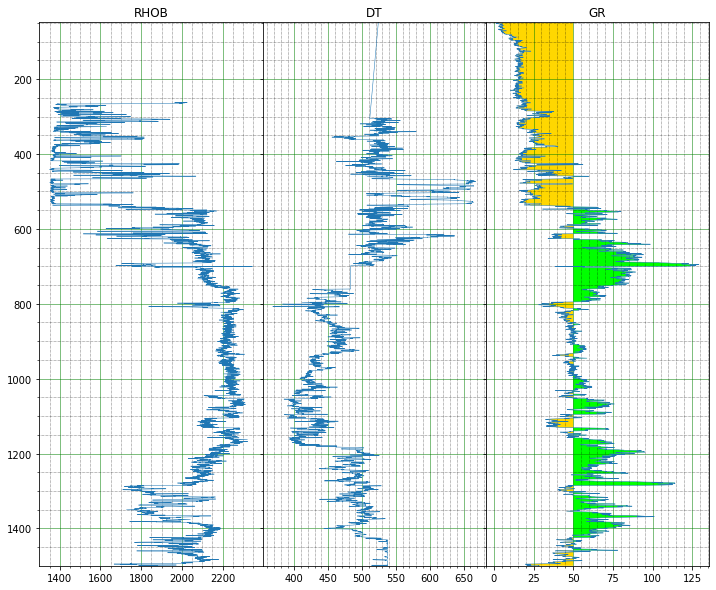

In [ ]:
#Well log Visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file = '/content/drive/MyDrive/Colab Notebooks/PythonforGeoscience/F02-1_logs.las'
data = lasio.read(file)
data = data.df()
data.reset_index(inplace = True)
data = data[['DEPTH', 'RHOB', 'DT', 'GR','PHIE']]
data = data.values
rows, cols = 1,3
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
mnemonics = ['RHOB', 'DT', 'GR','PHIE']
for i in range(cols):
    ax[i].plot(data[:,i+1], data[:,0],linewidth='0.5')
    ax[i].set_ylim(max(data[:, 0]), min(data[:, 0]))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black') #this is a comment
    ax[i].set_title('%s' %mnemonics[i])

y2 = data[:, 3]
y1 = y2*0+50
ax[2].fill_betweenx(data[:, 0], y1,y2, where=(y1>=y2), color='gold', linewidth=0)
ax[2].fill_betweenx(data[:, 0], y1,y2, where=(y1< y2), color='lime', linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()





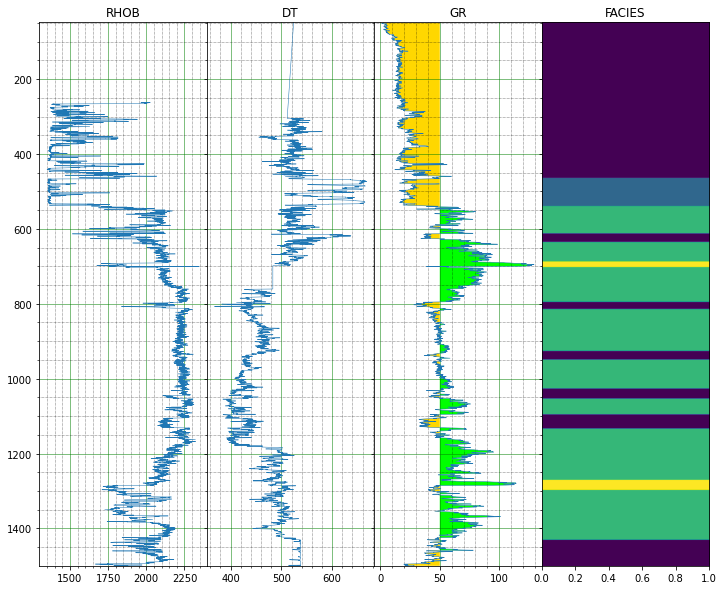

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file = '/content/drive/MyDrive/Colab Notebooks/PythonforGeoscience/F02-1_logs.las'
data = np.loadtxt(file,skiprows=35)
data[data==-999.2500]=np.nan
mnemonics = ['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AI_rel', 'PHIE']
data = pd.DataFrame(data,columns=mnemonics)
data = data[['DEPTH', 'RHOB', 'DT', 'GR']]
tb=  [0,464,539,612,635,687,702, 795, 814, 926, 949, 1026, 1053, 1095, 1133, 1270,1297, 1430,2000]
f = [1,2,3,1,3,4,3,1,3,1,3,1,3,1,3,4,3,1]
depth = data.DEPTH.values
facies=[]
for i in range(len(depth)):
    for j in range(len(tb)-1):
        if depth[i] > tb[j] and depth[i] <=tb[j+1]:
            facies.append(f[j])
data['FACIES']=facies
data.to_csv('well1.csv',index=False)

data = data.values
rows, cols = 1,4
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
mnemonics = ['RHOB', 'DT', 'GR','FACIES']
for i in range(cols):
    if i < cols-1:
        ax[i].plot(data[:,i+1], data[:,0],linewidth='0.5')
        ax[i].set_ylim(max(data[:, 0]), min(data[:, 0]))
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black') #this is a comment
        ax[i].set_title('%s' %mnemonics[i])
    elif i ==cols-1:
        F = np.vstack((facies,facies)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data[:, 0]), min(data[:, 0])])
        ax[i].set_title('%s' % mnemonics[i])
y2 = data[:, 3]
y1 = y2*0+50
ax[2].fill_betweenx(data[:, 0], y1,y2, where=(y1>=y2), color='gold', linewidth=0)
ax[2].fill_betweenx(data[:, 0], y1,y2, where=(y1< y2), color='lime', linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()


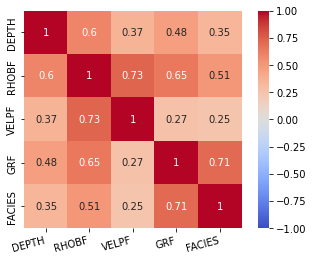

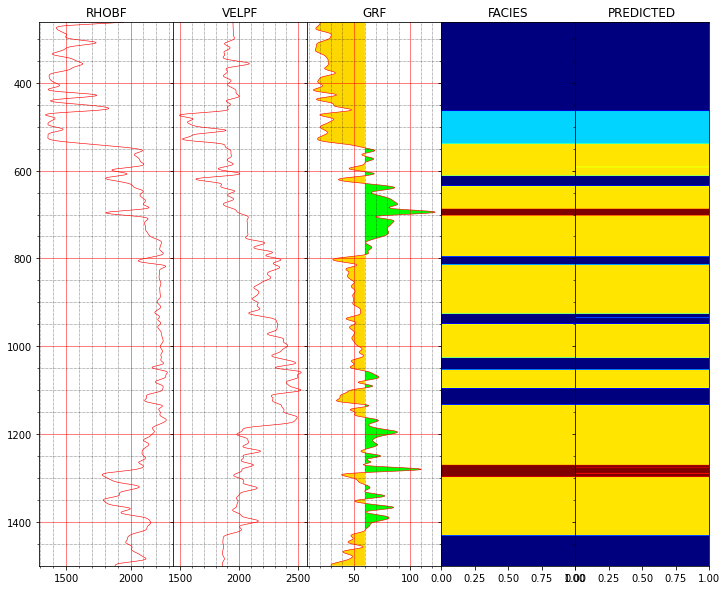

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import  StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PythonforGeoscience/well1.csv')
data['VELP']=1000000/data.DT
data = data[['DEPTH', 'RHOB', 'VELP', 'GR','FACIES' ]]
data = data.dropna(how='any')
data['RHOBF'] = butter_lowpass_filter(data.RHOB.values,10,1000/1, order=5)
data['VELPF'] = butter_lowpass_filter(data.VELP.values,10,1000/1, order=5)
data['GRF'] = butter_lowpass_filter(data.GR.values,10,1000/1, order=5)
data = data[['DEPTH', 'RHOBF', 'VELPF', 'GRF','FACIES' ]]
X_train = data.iloc[:,1:4].values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
Y_train = data.iloc[:,-1].values
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)  #global 'equation' for testing new datasets
X_test = X_train
#### confusion matrix
cor_train = data.corr()
cor_test = data.corr()
ax = sns.heatmap(
    cor_train,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,annot = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=15,
    horizontalalignment='right')
plt.show()
########################
y_pred = model.predict(X_test)
mnemonics = list(data.columns)
data = data.values
rows, cols = 1, 5
fig,ax = plt.subplots(nrows = rows, ncols=cols, figsize=(12,10), sharey=True)
for i in range(cols):
    if i < cols-2:
        ax[i].plot(data[:,i+1],data[:,0],'r', linewidth=0.6)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='red')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(data[:, 0]), min(data[:, 0]), 0)
        ax[i].set_title('%s' %mnemonics[i+1])
    elif i==cols-2:
        F = np.vstack((data[:,-1],data[:,-1])).T
        m = ax[i].imshow(F, aspect='auto',cmap='jet', extent=[0,1,max(data[:,0]), min(data[:,0])])
        ax[i].set_title('%s' % mnemonics[i + 1])
    elif i==cols-1:
        F = np.vstack((y_pred,y_pred)).T
        m = ax[i].imshow(F, aspect='auto',cmap='jet', extent=[0,1,max(data[:,0]), min(data[:,0])])
        ax[i].set_title('PREDICTED')
cl = 60
y2 = data[:,3]
y1 = y2*0+cl
ax[2].fill_betweenx(data[:, 0], y1, y2, where=(y1 >= y2), color='gold', linewidth=0)
ax[2].fill_betweenx(data[:, 0], y1, y2, where=(y1 < y2), color='lime', linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()



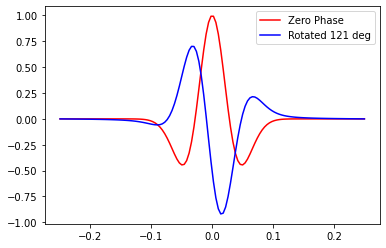

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import numpy as np
def rickerwavelet(f,tn,dt):
    t = np.arange(-tn/2, tn/2+dt, dt)/1000
    w1 = (1-2*np.pi**2*f**2*t**2)*np.exp(-np.pi**2*f**2*t**2)
    return t,w1

f = 8 #frequency in hertz
tn = 500 #wavelet length in ms
dt = 4 #sampling rate in ms
t,w1  = rickerwavelet(f,tn,dt)
h = hilbert(w1)
deg = 121  #wavelet rotation
theta = deg*np.pi/180
w2 = np.cos(theta)*h.real-np.sin(theta)*h.imag
plt.plot(t,w1,'r', label = 'Zero Phase')
plt.plot(t,w2, 'b', label = 'Rotated %s deg' %deg)
plt.legend()
plt.show()


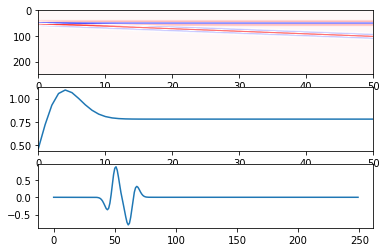

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
def rickerwavelet(f,tn,dt):
    t = np.arange(-tn/2, tn/2+dt, dt)/1000
    w1 = (1-2*np.pi**2*f**2*t**2)*np.exp(-np.pi**2*f**2*t**2)
    return t,w1

t,w1  = rickerwavelet(15,500,4)
ns = 250
nt = 51
ref=[]
traces=[]
for i in range(nt):
    R = np.zeros(ns)
    R[50] = 0.8
    R[52+i] =-0.7
    tr = convolve(R,w1, mode='same')
    traces.append(tr)
    ref.append(R)
ref = np.asarray(ref).T
traces = np.asarray(traces).T
plt.subplot(3,1,1)
plt.imshow(traces, aspect='auto', cmap='bwr_r')
plt.xlim(0,50)
plt.subplot(3,1,2)
amp50 = traces[50,:]
plt.plot(amp50)
plt.xlim(0,50)
plt.subplot(3,1,3)
trace9 = traces[:,9]
plt.plot(trace9)
plt.show()




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import  StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# pd.set_option('display.max_rows', None)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PythonforGeoscience/well1.csv')
data = data[['DEPTH', 'RHOB', 'DT', 'GR','FACIES' ]]
data = data.dropna(how='any')
X_train = data.iloc[:,1:4].values

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
Y_train = data.iloc[:,-1].values
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)  #global 'equation' for testing new datasets
X_test = X_train
y_pred = model.predict(X_test)



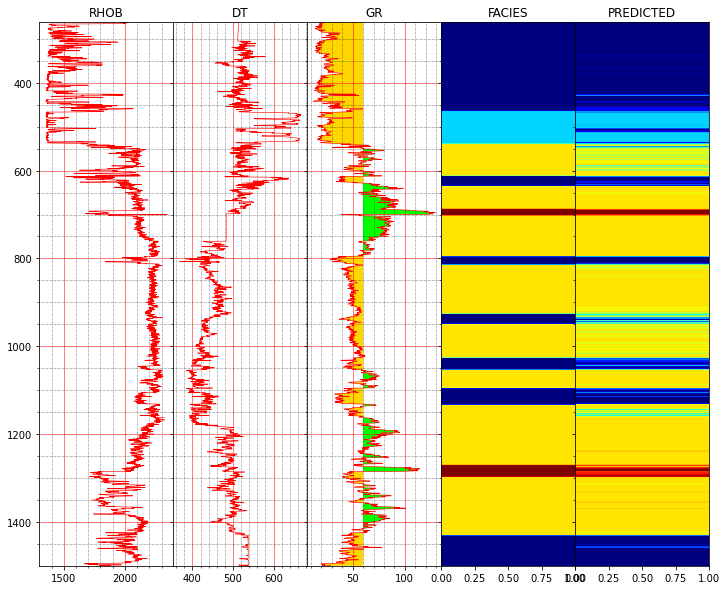

In [ ]:
y_pred = model.predict(X_test)
mnemonics = list(data.columns)
data = data.values
rows, cols = 1, 5
fig,ax = plt.subplots(nrows = rows, ncols=cols, figsize=(12,10), sharey=True)
for i in range(cols):
    if i < cols-2:
        ax[i].plot(data[:,i+1],data[:,0],'r', linewidth=0.6)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='red')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(data[:, 0]), min(data[:, 0]), 0)
        ax[i].set_title('%s' %mnemonics[i+1])
    elif i==cols-2:
        F = np.vstack((data[:,-1],data[:,-1])).T
        m = ax[i].imshow(F, aspect='auto',cmap='jet', extent=[0,1,max(data[:,0]), min(data[:,0])])
        ax[i].set_title('%s' % mnemonics[i + 1])
    elif i==cols-1:
        F = np.vstack((y_pred,y_pred)).T
        m = ax[i].imshow(F, aspect='auto',cmap='jet', extent=[0,1,max(data[:,0]), min(data[:,0])])
        ax[i].set_title('PREDICTED')
cl = 60
y2 = data[:,3]
y1 = y2*0+cl
ax[2].fill_betweenx(data[:, 0], y1, y2, where=(y1 >= y2), color='gold', linewidth=0)
ax[2].fill_betweenx(data[:, 0], y1, y2, where=(y1 < y2), color='lime', linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()
